# Exploratory Data Analysis for Click-Through Rate Prediction

The dataset was provided by the mobile advertising company Avazu as part of a [Kaggle competition](https://www.kaggle.com/competitions/avazu-ctr-prediction/overview)

*Dataset Citation: Steve Wang, Will Cukierski. (2014). Click-Through Rate Prediction. Kaggle. https://kaggle.com/competitions/avazu-ctr-prediction*


# Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import log_loss

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
contentRoot = '/content/drive/MyDrive/Github/machinelearning/click-through-prediction'

# Read data

In [4]:
df = pd.read_csv(f"{contentRoot}/data/sample_10_prepped_data.csv.gz")

In [5]:
print('Data: {}'.format(str(df.shape)))

Data: (4042897, 26)


## Define test and training datasets

Now that the column preprocessing is complete, we may define our test and training data.

In [ ]:
X_columns = ['hour', 'day_of_week', 'C1', 'banner_pos', 'site_id', 'site_domain',
             'site_category', 'app_id', 'app_domain', 'app_category', 'device_model',
             'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
             'C19', 'C20', 'C21']

In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(),['hour', 'day_of_week', 'C1', 'banner_pos',
                                        'site_id', 'site_domain', 'site_category',
                                        'app_id', 'app_domain', 'app_category',
                                        'device_model', 'device_type', 'device_conn_type',
                                        'C14', 'C15', 'C16', 'C17', 'C18',
                                        'C19', 'C20', 'C21']),
    remainder='passthrough')

In [ ]:
X = transformer.fit_transform(df[X_columns])
y = df['click']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

## Baseline Model

In [ ]:
dummy_estimator = DummyClassifier().fit(X_train, y_train)
dummy_train_score = dummy_estimator.score(X_train, y_train)
dummy_test_score = dummy_estimator.score(X_test, y_test)
print('Train Score with Dummy Classifier is {}'.format(dummy_train_score))
print('Test Score with Dummy Classifier is {}'.format(dummy_test_score))

Train Score with Dummy Classifier is 0.8300775928992904
Test Score with Dummy Classifier is 0.8303668158994781


## Grid Search for the best model

In [ ]:
scores_dict = {'Model':[],
                 'Best Estimator': [],
                 'Train Time':[],
                 'Train Accuracy':[],
                 'Test Accuracy':[]}


def train_model(model_name, model, param_grid):
  print(f"Training {model}")
  gscv = GridSearchCV(estimator=model, param_grid = param_grid, cv=3)
  gscv.fit(X_train, y_train)

  scores_dict['Model'].append(model_name)
  scores_dict['Best Estimator'].append(gscv.best_estimator_)
  scores_dict['Train Accuracy'].append(gscv.best_estimator_.score(X_train, y_train))
  scores_dict['Test Accuracy'].append(gscv.best_estimator_.score(X_test, y_test))
  scores_dict['Train Time'].append(gscv.cv_results_['mean_fit_time'].mean())

## Decision Tree Classifier

In [ ]:
dtree = DecisionTreeClassifier()
train_model('Decision Tree', dtree, {'max_depth':[0,4,10,100]})

Training DecisionTreeClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_

In [ ]:
print(scores_dict)

{'Model': ['Decision Tree'], 'Best Estimator': [DecisionTreeClassifier(max_depth=10)], 'Train Time': [360.3462048570315], 'Train Accuracy': [0.8340323254866473], 'Test Accuracy': [0.8341627709482468]}


## Logistic Regression

In [ ]:
logistic_regression = LogisticRegression()
train_model('Logistic Regression', logistic_regression, {'max_iter':[10000]})

Training LogisticRegression()


In [ ]:
print(scores_dict)

{'Model': ['Logistic Regression'], 'Best Estimator': [LogisticRegression(max_iter=10000)], 'Train Time': [288.8871890703837], 'Train Accuracy': [0.8350623509952378], 'Test Accuracy': [0.8351026903130591]}


## K Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
train_model('K Nearest Neighbors', knn, {'n_neighbors':[3,9,15]})

Training KNeighborsClassifier()


In [ ]:
print(scores_dict)

Grid Search on KNN did not return within reasonable time on the runtime. Given that KNN is not optimal for datasets with large dimensionality, we will not pursue KNN further.

## Support Vector Machine

In [ ]:
svc = SVC()
train_model('Support Vector Machine', svc, {'kernel':['linear', 'rbf'], 'gamma': [-30,0,30]})

Training SVC()


In [ ]:
print(scores_dict)

The Grid Search on SVC was beyond the capability of the runtime, so an SVC with default parameters was tried.

In [ ]:
import time
start_time = time.time()
svc_default = SVC().fit(X_train, y_train)
svc_default.score(X_test, y_test)
end_time = time.time()

In [ ]:
scores_dict['Model'].append('SVC')
scores_dict['Best Estimator'].append(svc_default)
scores_dict['Train Accuracy'].append(svc_default.score(X_train, y_train))
scores_dict['Test Accuracy'].append(svc_default.score(X_test, y_test))
scores_dict['Train Time'].append(end_time - start_time)

In [ ]:
print(scores_dict)

## Summary of results after Grid Search of various models

Due to the high dimensionality of the data, grid search on SVM and KNN could not complete execution in reasonable time (~xx hours). The results of LogisticRegression and DecisionTree are as below.

LogisticRegression performed better with a `max_iter=10000` and DecisionTree performed better with a `max_depth=10`.

In [ ]:
output_dict = {'Model': ['Decision Tree', 'Logistic Regression'],
               'Best Estimator': ['DecisionTreeClassifier(max_depth=10)', 'LogisticRegression(max_iter=10000)'],
               'Train Time': [360.3462048570315, 288.8871890703837],
               'Train Accuracy': [0.8340323254866473, 0.8350623509952378],
               'Test Accuracy': [0.8341627709482468, 0.8351026903130591]}

results_df = pd.DataFrame(output_dict)
results_df

,Model,Best Estimator,Train Time,Train Accuracy,Test Accuracy
0,Decision Tree,DecisionTreeClassifier(max_depth=10),360.346205,0.834032,0.834163
1,Logistic Regression,LogisticRegression(max_iter=10000),288.887189,0.835062,0.835103


## Neural Networks

Next step is to try neural  networks for this problem to increase the accuracy above 83.5%

In [ ]:
X_train.shape

(283003, 5409)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(None,5409)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.toarray(), y_train, epochs=32, batch_size=64, validation_data=(X_test.toarray(), y_test))
print(history)

Epoch 1/32
4422/4422 [==============================] - 30s 6ms/step - loss: 0.4156 - accuracy: 0.8314 - val_loss: 0.4069 - val_accuracy: 0.8344
Epoch 2/32
4422/4422 [==============================] - 19s 4ms/step - loss: 0.4098 - accuracy: 0.8329 - val_loss: 0.4060 - val_accuracy: 0.8344
Epoch 3/32
4422/4422 [==============================] - 18s 4ms/step - loss: 0.4085 - accuracy: 0.8334 - val_loss: 0.4059 - val_accuracy: 0.8347
Epoch 4/32
4422/4422 [==============================] - 19s 4ms/step - loss: 0.4077 - accuracy: 0.8336 - val_loss: 0.4056 - val_accuracy: 0.8350
Epoch 5/32
4422/4422 [==============================] - 19s 4ms/step - loss: 0.4070 - accuracy: 0.8339 - val_loss: 0.4057 - val_accuracy: 0.8351
Epoch 6/32
4422/4422 [==============================] - 19s 4ms/step - loss: 0.4064 - accuracy: 0.8340 - val_loss: 0.4063 - val_accuracy: 0.8353
Epoch 7/32
4422/4422 [==============================] - 18s 4ms/step - loss: 0.4059 - accuracy: 0.8344 - val_loss: 0.4057 - val_ac

Text(0, 0.5, 'Accuracy')

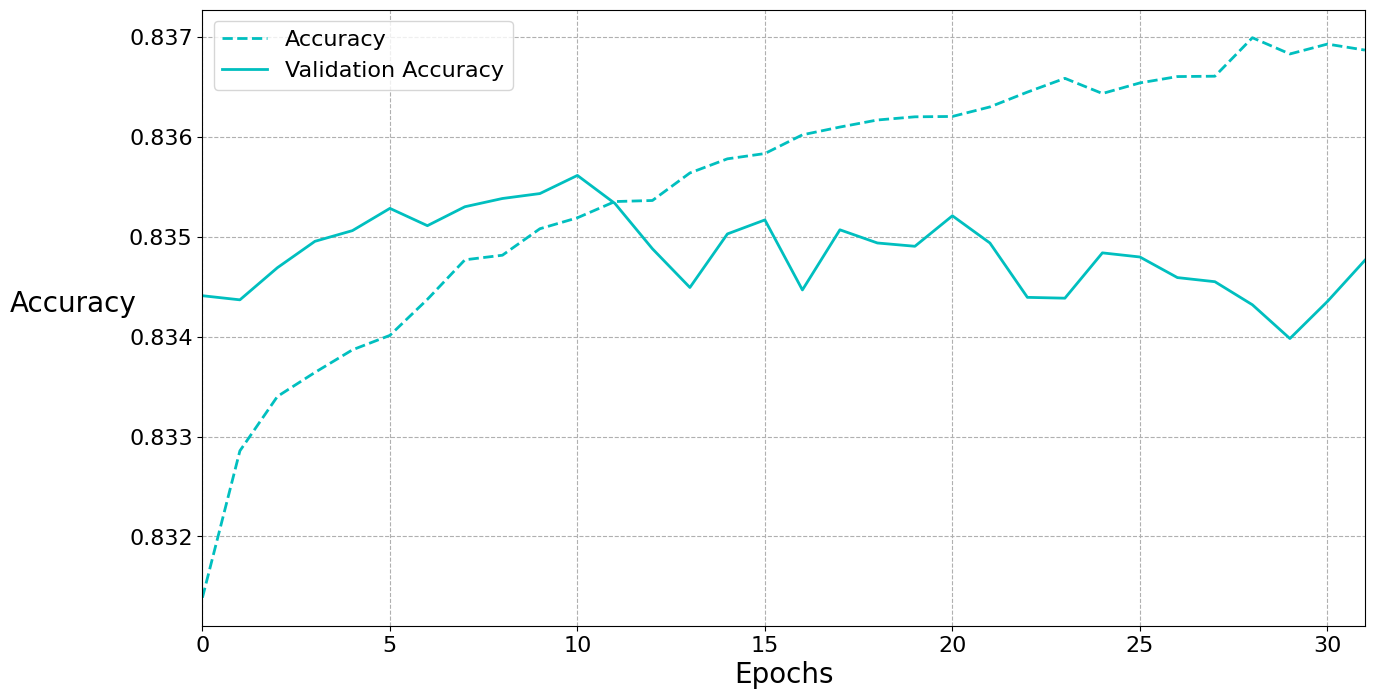

In [ ]:
e = range(32)


plt.figure(figsize=(15,8))
plt.plot(e,history.history['accuracy'], 'c--', linewidth=2, label='Accuracy')
plt.plot(e,history.history['val_accuracy'], 'c-', linewidth=2, label='Validation Accuracy')
plt.xlim(0,32-1)
plt.legend(fontsize=16)
plt.grid(linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20,rotation=0, labelpad=40)

Based on this analysis, after 10 epochs, the validation accuracy falls due to overfitting.

# Analyzing the results

## Logistic Regression

Since LogisticRegression performs slightly better on accuracy and train time, we will plot various performance measures for the estimator.

In [ ]:
lr = LogisticRegression(max_iter=10000).fit(X_train, y_train)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

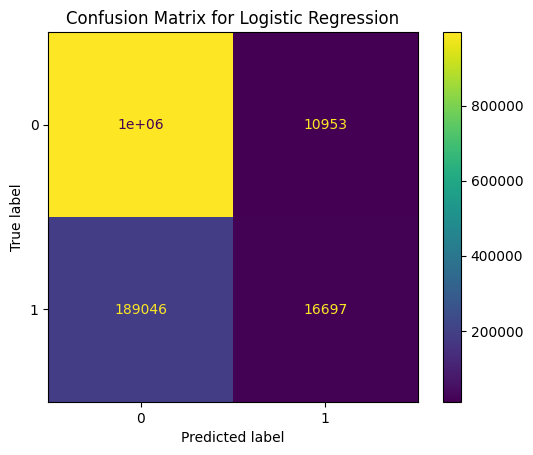

In [ ]:

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=lr.classes_)
cm_display.plot()
cm_display.ax_.set_title("Confusion Matrix for Logistic Regression")

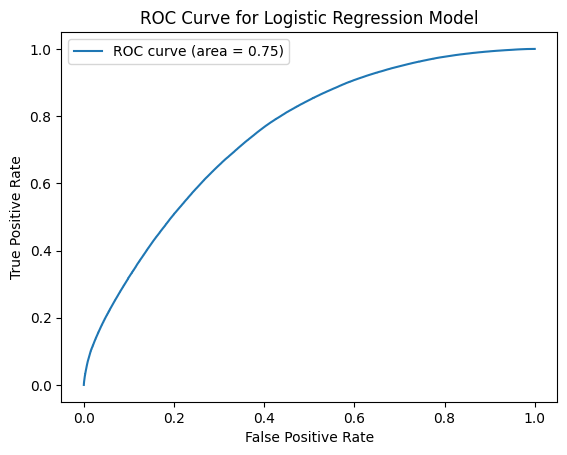

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend()
plt.show()

In [ ]:
print("Log Loss of Logistic Regression Model")
print(log_loss(y_test, y_pred_proba))

Log Loss of Logistic Regression Model
0.39681914293512616


## Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

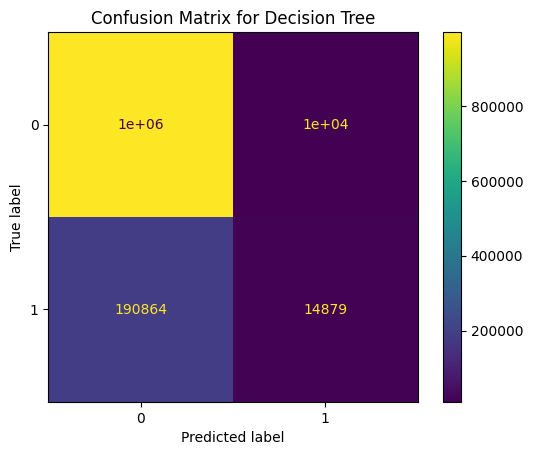

In [ ]:
y_pred_dtree = dtree.predict(X_test)
y_pred_dtree_proba = dtree.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred_dtree)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=dtree.classes_)
cm_display.plot()
cm_display.ax_.set_title("Confusion Matrix for Decision Tree")

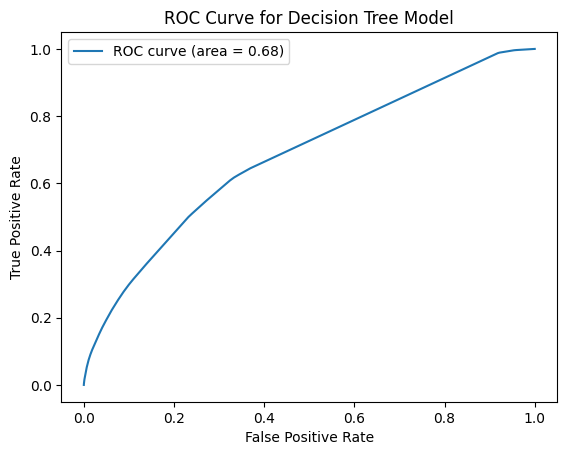

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtree_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend()
plt.show()

In [ ]:
print("Log Loss of Decision Tree Model")
print(log_loss(y_test, y_pred_dtree_proba))

Log Loss of Decision Tree Model
0.42229235640198715


## Neural Networks

The sequential network returned a validation set accuracy of 83.55% which was the highest among the models tested.

## Findings

Both LogisticRegression and DecisionTreeClassifier produced a 0.5% improvement in accuracy. Other characteristics such as area under the curve and log loss is also better for LogisticRegression. So we will choose LogisticRegression with max_iter as 10,000 as our best model.

Additionally, a sequential neural network was trained on part of the data and it returned a 0.55% improvement in accuracy over the base model. This was the highest among all the models trained.

# Next Steps - Ensemble techniques & Neural Networks

While the individual models did yield minimal accuracy than baseline, other methods such as ensemble techniques specifically Random Forests should be tried. This was explored, but the capabilities of the runtime did not allow for a model fit run. The goal would be to use an algorithm tuned for GPU, such as the `cuML` library to run a RandomForestClassifier training.

Additionally, with proper tuning, Neural networks are likely to produce higher accuracy than other models, so this avenue needs to be explored further. However, this can be computationally intensive given the size of the dataset.